In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#no_city = 10

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size= 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size= 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [41]:
#OPTION 1:

# OpenWeatherMap API Key
api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
temp_list = []
hum_list = []
cloud_list = []
wind_list = []
lat_list = []


# Starting URL for Weather Map API Call
for city in cities:
    ow_data = requests.get(url).json()
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(query).json()
      
    try:
        temp = response['main']['temp_max']
        temp_list.append(temp)
        hum = response['main']['humidity']
        hum_list.append(hum)
        cloud = response['clouds']['all']
        cloud_list.append(cloud)
        wind = response['wind']['speed']
        wind_list.append(wind)
        lat = response['coord']['lat']
        lat_list.append(lat)
               
        
    except KeyError:
        print(city, wind)        

illoqqortoormiut 5.75
taolanaro 6.53
domoni 2.24
attawapiskat 14.25
barentsburg 11.23
tumannyy 2.24
ruatoria 8.05
vestbygda 10.78
bur gabo 11.34
samusu 6.2
rungata 5.82
amderma 4.18
vaitupu 8.05
kusk 2.17
bac lieu 12.75
lolua 8.05
nizhneyansk 16.82
belushya guba 8.21
asau 18.34
sahrak 3.36
bargal 5.82
araguacu 2.84
sakakah 12.75
palabuhanratu 16.82
grand river south east 8.05
tabiauea 4.74
sentyabrskiy 6.08
kegayli 6.08
eldikan 5.19
mys shmidta 10.56
kamenskoye 7.2
tsihombe 7.31
olafsvik 16.26
sofiysk 16.26
ambodifototra 23.04
urumqi 1.16
mafinga 2.73
satitoa 14.99
kuche 14.99
saleaula 10.67
taraza 10.67
khormuj 8.99
tekeli 6.76
paradwip 5.64
pemangkat 14.99
safaga 16.15
tuggurt 8.43
galiwinku 2.17
umzimvubu 4.52
westpunt 18.34
san jeronimo de tunan 4.7
karaul 4.7
warqla 9.17
yuancheng 5.82
murud 6.98
teluk nibung 11.68
acuna 6.42
temaraia 9.55
bengkulu 11.41
aflu 2.24


In [42]:
# create dataframe
weather_df = pd.DataFrame({
    "Temperature": temp_list, 
    "Humidity": hum_list,
    "Clouds":cloud_list,
    "Wind": wind_list,
    "Latitud": lat_list,
})

weather_df

,Temperature,Humidity,Clouds,Wind,Latitud
0,50.99,98,92,5.75,-42.48
1,81.05,96,68,6.53,21.70
2,60.80,77,90,8.05,60.79
3,78.35,72,0,15.59,-2.92
4,78.80,65,1,8.05,45.36
5,72.14,53,0,5.41,42.84
6,75.20,94,75,3.36,1.56
7,61.52,86,0,22.19,-33.59
8,71.42,64,0,3.18,51.67
9,50.09,92,0,4.41,-26.65


<function matplotlib.pyplot.show(*args, **kw)>

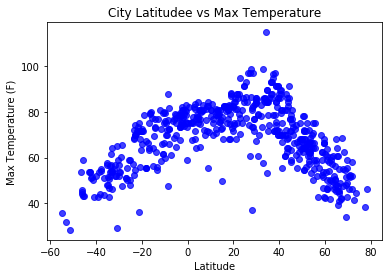

In [58]:
# scatter plots Lat vs Max Temp
plt.scatter(lat_list, temp_list, marker = "o", facecolors = "blue", alpha=0.75)
x_limit = 100

plt.title("City Latitudee vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

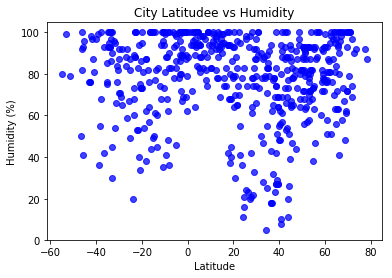

In [53]:
# scatter plots Lat vs Humidity
plt.scatter(lat_list, hum_list, marker = "o", facecolors = "blue", alpha=0.75)

plt.title("City Latitudee vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

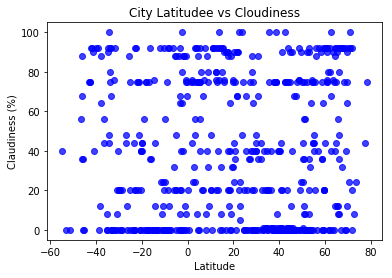

In [55]:
# scatter plots Lat vs Cludiness

plt.scatter(lat_list, cloud_list, marker = "o", facecolors = "blue", alpha=0.75)

plt.title("City Latitudee vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Claudiness (%)")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

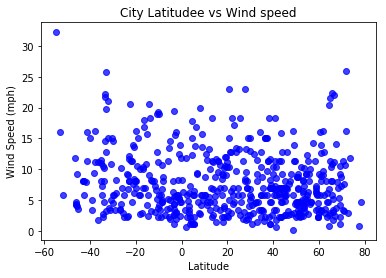

In [52]:
plt.scatter(lat_list, wind_list, marker = "o", facecolors = "blue", alpha=0.75)

plt.title("City Latitudee vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show

In [ ]:
# Observations:

# 1) Max temperatures tend to have the same leves as they distance from the ecuador from both north and south regions
# 2) There is no clear relationship between the latitude and cloudiness. Clouds are generated in the ocean.
# therefore, cities in same latitudes but far from the ocean can have a different results.
# 3) There is no relationship between speed of wind and latitude. Speed of wind depends on other factors, not latitude.